In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import time
import rebound
import matplotlib.pyplot as plt
import numpy as np
import vanillaWH_bruteforce_nbody
import integrator_tools
import vanillaWH

%matplotlib inline

# configuring plots
#plt.rc('text', usetex=True)            # use LaTeX for text
plt.rc('font', family='serif')          # use serif font
plt.rcParams.update({'font.size': 14})  # increase font size

In [4]:
# initial conditions from Mikkola 1997
# particle array as [x, y, z, vx, vy, vz, m]
SS = rebound.Simulation()
rebound.data.add_outer_solar_system(SS)

# particle array as [x, y, z, vx, vy, vz, m], massless Pluto
p0 = np.array([SS.particles[0].x,SS.particles[0].y,SS.particles[0].z,SS.particles[0].vx,SS.particles[0].vy,SS.particles[0].vz,SS.particles[0].m])
p1 = np.array([SS.particles[1].x,SS.particles[1].y,SS.particles[1].z,SS.particles[1].vx,SS.particles[1].vy,SS.particles[1].vz,SS.particles[1].m])
p2 = np.array([SS.particles[2].x,SS.particles[2].y,SS.particles[2].z,SS.particles[2].vx,SS.particles[2].vy,SS.particles[2].vz,SS.particles[2].m])
p3 = np.array([SS.particles[3].x,SS.particles[3].y,SS.particles[3].z,SS.particles[3].vx,SS.particles[3].vy,SS.particles[3].vz,SS.particles[3].m])
p4 = np.array([SS.particles[4].x,SS.particles[4].y,SS.particles[4].z,SS.particles[4].vx,SS.particles[4].vy,SS.particles[4].vz,SS.particles[4].m])
p5 = np.array([SS.particles[5].x,SS.particles[5].y,SS.particles[5].z,SS.particles[5].vx,SS.particles[5].vy,SS.particles[5].vz,0.])
sim = np.stack([p0, p1, p2, p3, p4, p5])
masses = sim[:,-1]

sim_jacobi = integrator_tools.inertial_to_jacobi(sim)

sim = integrator_tools.jacobi_to_inertial(sim_jacobi, masses)

N_orbits = 160
steps_per_orbit = 30
timestep = 1./steps_per_orbit * 2*np.pi
N_steps = N_orbits*steps_per_orbit

energy_error = np.zeros(N_steps)
E0 = integrator_tools.energy_fn(sim)

orbit_soln = np.zeros((len(sim_jacobi), 3, N_steps)) # [object, position, N_steps]
orbit_soln[:,0,0], orbit_soln[:,1,0], orbit_soln[:,2,0] = sim_jacobi[:,0], sim_jacobi[:,1], sim_jacobi[:,2]

start = time.time()

for i in range(N_steps):
    
    # drift
    sim_jacobi = vanillaWH_bruteforce_nbody.drift(sim_jacobi, sim, h=timestep/2)
    sim = integrator_tools.jacobi_to_inertial(sim_jacobi, masses)
    
    # kick
    sim_jacobi = vanillaWH_bruteforce_nbody.kick(sim_jacobi, sim, h=timestep)
    
    # drift
    sim_jacobi = vanillaWH_bruteforce_nbody.drift(sim_jacobi, sim, h=timestep/2)
    sim = integrator_tools.jacobi_to_inertial(sim_jacobi, masses)

    E = integrator_tools.energy_fn(sim)
    energy_error[i] = (E-E0)/E0

    orbit_soln[:, 0, i] = sim_jacobi[:,0]
    orbit_soln[:, 1, i] = sim_jacobi[:,1]
    orbit_soln[:, 2, i] = sim_jacobi[:,2]

end = time.time()

print('time to integrate =', np.round(end - start, 1), 's')

time to integrate = 6.7 s


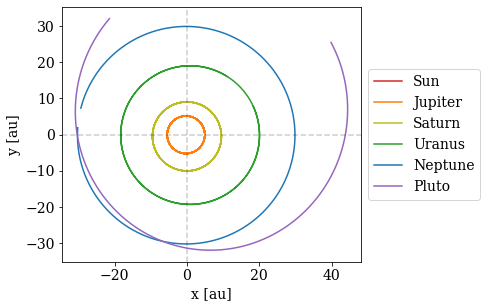

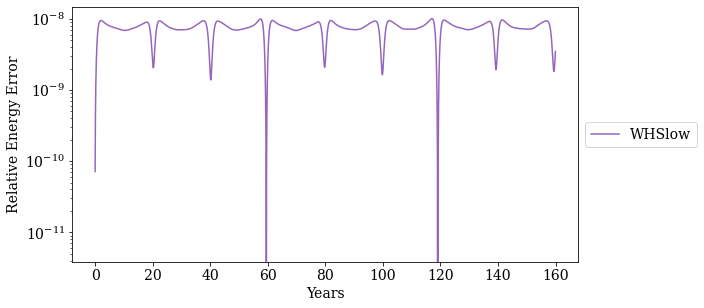

In [5]:
orbital_periods = timestep*np.arange(N_steps)/ (2*np.pi)

plt.figure(figsize=(10,4.5))
plt.plot(orbit_soln[0,0], orbit_soln[0,1], label='Sun', c='tab:red')
plt.plot(orbit_soln[1,0], orbit_soln[1,1], label='Jupiter', c='tab:orange')
plt.plot(orbit_soln[2,0], orbit_soln[2,1], label='Saturn', c='tab:olive')
plt.plot(orbit_soln[3,0], orbit_soln[3,1], label='Uranus', c='tab:green')
plt.plot(orbit_soln[4,0], orbit_soln[4,1], label='Neptune', c='tab:blue')
plt.plot(orbit_soln[5,0], orbit_soln[5,1], label='Pluto', c='tab:purple')

plt.axhline(0, ls='--', alpha=0.2, c='black')
plt.axvline(0, ls='--', alpha=0.2, c='black')
plt.axis('scaled')
#plt.xlim(-50,50)
#plt.ylim(-10,90)
plt.xlabel('x [au]')
plt.ylabel('y [au]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
#plt.savefig('SS.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10,4.5))
plt.plot(orbital_periods, energy_error, label='WHSlow', c='tab:purple')
plt.yscale('log')
#plt.ylim(-6e-5, 6e-5)
plt.xlabel('Years')
plt.ylabel('Relative Energy Error')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
#plt.savefig('SS_energy_error.jpg', dpi=300)
plt.show()

energy_error2 = np.copy(energy_error)

In [6]:
# initial conditions from Mikkola 1997
# particle array as [x, y, z, vx, vy, vz, m]
SS = rebound.Simulation()
rebound.data.add_outer_solar_system(SS)

# particle array as [x, y, z, vx, vy, vz, m], massless Pluto
p0 = np.array([SS.particles[0].x,SS.particles[0].y,SS.particles[0].z,SS.particles[0].vx,SS.particles[0].vy,SS.particles[0].vz,SS.particles[0].m])
p1 = np.array([SS.particles[1].x,SS.particles[1].y,SS.particles[1].z,SS.particles[1].vx,SS.particles[1].vy,SS.particles[1].vz,SS.particles[1].m])
p2 = np.array([SS.particles[2].x,SS.particles[2].y,SS.particles[2].z,SS.particles[2].vx,SS.particles[2].vy,SS.particles[2].vz,SS.particles[2].m])
p3 = np.array([SS.particles[3].x,SS.particles[3].y,SS.particles[3].z,SS.particles[3].vx,SS.particles[3].vy,SS.particles[3].vz,SS.particles[3].m])
p4 = np.array([SS.particles[4].x,SS.particles[4].y,SS.particles[4].z,SS.particles[4].vx,SS.particles[4].vy,SS.particles[4].vz,SS.particles[4].m])
p5 = np.array([SS.particles[5].x,SS.particles[5].y,SS.particles[5].z,SS.particles[5].vx,SS.particles[5].vy,SS.particles[5].vz,SS.particles[5].m])
sim = np.stack([p0, p1, p2, p3, p4, p5])
masses = sim[:,-1]

sim_jacobi = integrator_tools.inertial_to_jacobi(sim)

sim = integrator_tools.jacobi_to_inertial(sim_jacobi, masses)

N_orbits = 160
steps_per_orbit = 30
timestep = 1./steps_per_orbit * 2*np.pi
N_steps = N_orbits*steps_per_orbit

energy_error = np.zeros(N_steps)
E0 = integrator_tools.energy_fn(sim)

orbit_soln = np.zeros((len(sim_jacobi), 3, N_steps)) # [object, position, N_steps]
orbit_soln[:,0,0], orbit_soln[:,1,0], orbit_soln[:,2,0] = sim_jacobi[:,0], sim_jacobi[:,1], sim_jacobi[:,2]

start = time.time()

for i in range(N_steps):
    
    # drift
    #sim_jacobi = vanillaWH_bruteforce_nbody.drift(sim_jacobi, sim, h=timestep/2)
    sim_jacobi = vanillaWH.drift(sim_jacobi, sim, h=timestep/2)
    sim = integrator_tools.jacobi_to_inertial(sim_jacobi, masses)
    
    # kick
    sim_jacobi = vanillaWH.kick(sim_jacobi, sim, h=timestep)
    
    # drift
    sim_jacobi = vanillaWH.drift(sim_jacobi, sim, h=timestep/2)
    sim = integrator_tools.jacobi_to_inertial(sim_jacobi, masses)

    E = integrator_tools.energy_fn(sim)
    energy_error[i] = (E-E0)/E0

    orbit_soln[:, 0, i] = sim_jacobi[:,0]
    orbit_soln[:, 1, i] = sim_jacobi[:,1]
    orbit_soln[:, 2, i] = sim_jacobi[:,2]

end = time.time()

print('time to integrate =', np.round(end - start, 1), 's')

time to integrate = 6.7 s


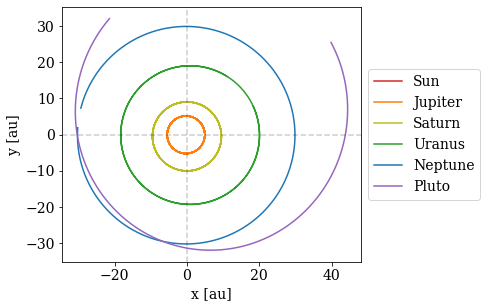

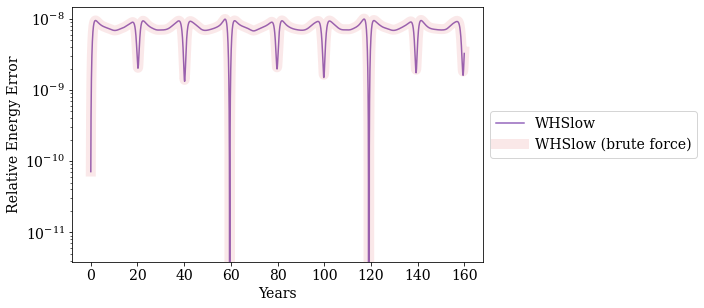

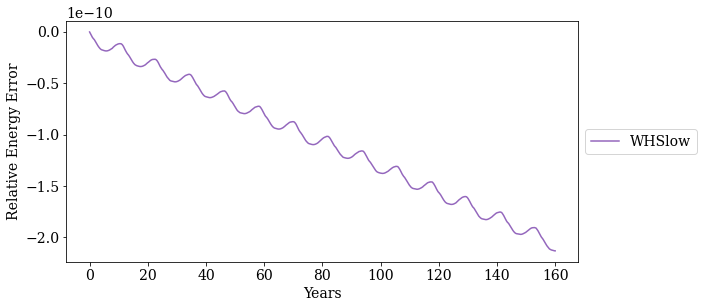

In [7]:
orbital_periods = timestep*np.arange(N_steps)/ (2*np.pi)

plt.figure(figsize=(10,4.5))
plt.plot(orbit_soln[0,0], orbit_soln[0,1], label='Sun', c='tab:red')
plt.plot(orbit_soln[1,0], orbit_soln[1,1], label='Jupiter', c='tab:orange')
plt.plot(orbit_soln[2,0], orbit_soln[2,1], label='Saturn', c='tab:olive')
plt.plot(orbit_soln[3,0], orbit_soln[3,1], label='Uranus', c='tab:green')
plt.plot(orbit_soln[4,0], orbit_soln[4,1], label='Neptune', c='tab:blue')
plt.plot(orbit_soln[5,0], orbit_soln[5,1], label='Pluto', c='tab:purple')

plt.axhline(0, ls='--', alpha=0.2, c='black')
plt.axvline(0, ls='--', alpha=0.2, c='black')
plt.axis('scaled')
#plt.xlim(-50,50)
#plt.ylim(-10,90)
plt.xlabel('x [au]')
plt.ylabel('y [au]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
#plt.savefig('SS.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10,4.5))
plt.plot(orbital_periods, energy_error, label='WHSlow', c='tab:purple')
plt.plot(orbital_periods, energy_error2, label='WHSlow (brute force)', lw=10, alpha=0.1, c='tab:red')
plt.yscale('log')
#plt.ylim(-6e-5, 6e-5)
plt.xlabel('Years')
plt.ylabel('Relative Energy Error')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
#plt.savefig('SS_energy_error.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10,4.5))
plt.plot(orbital_periods, energy_error-energy_error2, label='WHSlow', c='tab:purple')
#plt.yscale('log')
#plt.ylim(-6e-5, 6e-5)
plt.xlabel('Years')
plt.ylabel('Relative Energy Error')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
#plt.savefig('SS_energy_error.jpg', dpi=300)
plt.show()
